In [1]:
import numpy as np
from math import sin, cos, pi, sqrt, factorial, fabs, acos

from numpy.fft import fft
from numpy import complex128, float64
import time
import pyfftw

In [2]:
from pyfftw.pyfftw import FFTW

In [3]:
Lmax = 3

In [4]:
a_coef = np.random.normal(size = (Lmax+1, Lmax+1))
b_coef = np.random.normal(size = (Lmax+1, Lmax+1))

#a_coef = np.ones((Lmax+1, Lmax+1))
#b_coef = np.ones((Lmax+1, Lmax+1))

a_coef[0][0] = 0.0

for m in xrange(0, Lmax+1):
    for l in xrange(0, m):
        a_coef[m][l] = 0.0     
        
for m in xrange(0, Lmax+1):
    for l in xrange(0, m):
        b_coef[m][l] = 0.0
        
for l in xrange(0, Lmax+1):
        b_coef[0][l] = 0.0

In [5]:
N = 2048

field = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [6]:
time0 = time.clock()
for j in xrange(0, N/2):
    
        teta = 2*pi*j/float(N)
        
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
                
        F = np.zeros((N+1))
        F_ = np.zeros((N+1))     
        
        func1 = 0.0
        func2 = 0.0
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):
                func1 = func1 + a_coef[m][l]*P_[m][l]
                func2 = func2 + b_coef[m][l]*P_[m][l]
    
            F[m] = func1
            F_[m] = func2
                
            func1 = 0.0
            func2 = 0.0
    
        T = np.real(fft(F)) + np.imag(fft(F_))
        
        for i in xrange(0, N):
            phi = pi*i*2/float(N)
           
            field[i][j] = T[i]
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)
time1 = time.clock()

In [7]:
time1-time0

13.132349999999999

In [8]:
field.shape

(2048, 1024)

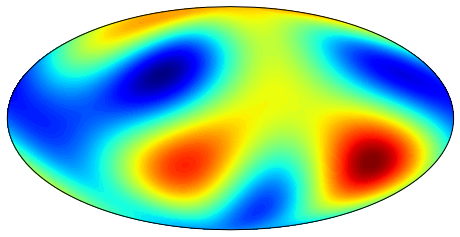

In [9]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

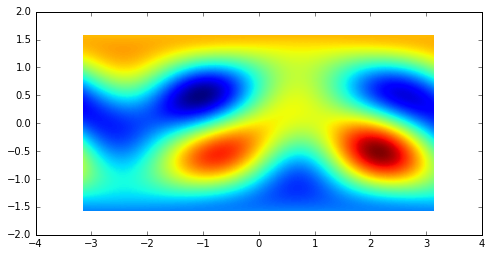

In [10]:
plt.figure(figsize=(8,4))
ax = plt.pcolormesh(x, y, field)
plt.show()

FFTW test

In [11]:
pyfftw.interfaces.cache.enable()

In [12]:
time0 = time.clock()
for j in xrange(0, N/2):
    
        teta = 2*pi*j/float(N)
        
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
                
        F = complex128(np.zeros((N+1)))
        F_ = complex128(np.zeros((N+1)))   
        
        func1 = 0.0
        func2 = 0.0
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):
                func1 = func1 + a_coef[m][l]*P_[m][l]
                func2 = func2 + b_coef[m][l]*P_[m][l]
    
            F[m] = func1
            F_[m] = func2
                
            func1 = 0.0
            func2 = 0.0
            
        T = np.real(pyfftw.interfaces.numpy_fft.fft(F)) + np.imag(pyfftw.interfaces.numpy_fft.fft(F_))
        
        for i in xrange(0, N):
            phi = pi*i*2/float(N)
           
            field[i][j] = T[i]
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)
time1 = time.clock()

In [13]:
time1-time0

9.874085000000001

In [14]:
field.shape

(2048, 1024)

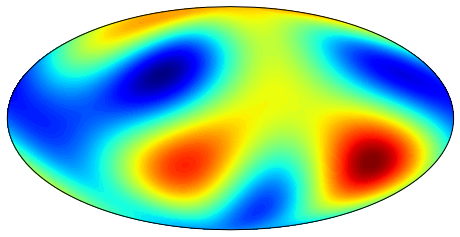

In [15]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

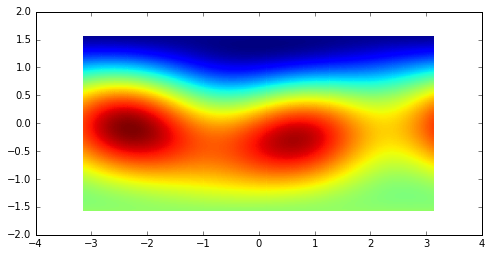

In [22]:
plt.figure(figsize=(8,4))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [23]:
level = 0.0
f = field

In [24]:
# S
area = 0.0
narea = 0.0


for i in xrange(0, N-1):
    for j in xrange(1, N/2-1):
        if ((f[i][j] + f[i+1][j+1] + f[i+1][j] + f[i][j+1])/4.0 > level):
            area = area + fabs(sin(y[i][j]))
            
for i in xrange(0, N-1):
    for j in xrange(1, N/2-1):
            narea = narea + fabs(sin(y[i][j]))            

area = area/narea
print area

0.278134678479


In [25]:
# l

l = 0.0
n = 0.0
nl = 0.0

f = field - level

teta = y
phi = x

for i in xrange(0, N-1):
    for j in xrange(0, N/2-1):
        
        
        h_teta = y[N/2+1][N/4+1]
        h_phi = fabs(x[i][0] - x[i+1][0])
        
        sql = 0.0
         
        phi1 = 0.0
        phi2 = 0.0
        teta1 = 0.0
        teta2 = 0.0
        
        if (f[i][j]*f[i][j+1] < 0.0):
                    
            if (f[i][j]*f[i+1][j] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
            
                teta2 = teta[i][j]
                phi2 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
                
            
        if (f[i][j]*f[i+1][j] < 0.0):
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)  
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
            
        if (f[i+1][j]*f[i+1][j+1] < 0.0):
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i+1][j]
                teta1 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2) 
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql  
    
print l/pi

3.08654097755


In [26]:
# spin-weighted spherical harmonics

#----------------------------------------------------------
#
# This module computes spin-weighted spherical harmonics.
#
# Released under the MIT License.
# (C) Christian Reisswig 2009-2011
#
#----------------------------------------------------------

#def fac(n):
#    result = 1
#
#    for i in range(2, n+1):
#        result *= i
#
#    return result

# coefficient function
def Cslm(s, l, m):
    return sqrt( l*l * (4.0*l*l - 1.0) / ( (l*l - m*m) * (l*l - s*s) ) )

# recursion function
def s_lambda_lm(s, l, m, x):

    Pm = pow(-0.5, m)

    if (m !=  s): Pm = Pm * pow(1.0+x, (m-s)*1.0/2)
    if (m != -s): Pm = Pm * pow(1.0-x, (m+s)*1.0/2)
   
    Pm = Pm * sqrt( factorial(2*m + 1) * 1.0 / ( 4.0*pi * factorial(m+s) * factorial(m-s) ) )
   
    if (l == m):
        return Pm
   
    Pm1 = (x + s*1.0/(m+1) ) * Cslm(s, m+1, m) * Pm
   
    if (l == m+1):
        return Pm1
    else:
        for n in range (m+2, l+1):
      
            Pn = (x + s*m * 1.0 / ( n * (n-1.0) ) ) * Cslm(s, n, m) * Pm1 - Cslm(s, n, m) * 1.0 / Cslm(s, n-1, m) * Pm
            Pm = Pm1
            Pm1 = Pn
         
      
        return Pn

def sYlm(ss, ll, mm, theta, phi):
   
    Pm = 1.0

    l = ll
    m = mm
    s = ss

    if (l < 0):
        return 0
    if (abs(m) > l or l < abs(s)):
        return 0

    if (abs(mm) < abs(ss)):
        s=mm
        m=ss
        if ((m+s) % 2):
            Pm  = -Pm

   
    if (m < 0):
        s=-s
        m=-m
        if ((m+s) % 2):
            Pm  = -Pm

    result = Pm * s_lambda_lm(s, l, m, cos(theta))

    return complex(result * cos(mm*phi), result * sin(mm*phi))

def sYlm_fix(ss, ll, mm, theta):
   
    Pm = 1.0

    l = ll
    m = mm
    s = ss

    if (l < 0):
        return 0
    if (abs(m) > l or l < abs(s)):
        return 0

    if (abs(mm) < abs(ss)):
        s=mm
        m=ss
        if ((m+s) % 2):
            Pm  = -Pm

   
    if (m < 0):
        s=-s
        m=-m
        if ((m+s) % 2):
            Pm  = -Pm

    result = Pm * s_lambda_lm(s, l, m, cos(theta))

    return result

In [27]:
N = 512

field = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [29]:
for i in xrange(0, N):
    for j in xrange(0, N/2): 
        
        teta = pi/2*j*4/float(N) 
        phi = i*2/float(N)*pi
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
        
        field[i][j] = np.real(sYlm(-1, 1, 1, teta, phi)) + np.real(sYlm(1, 1, 1, teta, phi)) 

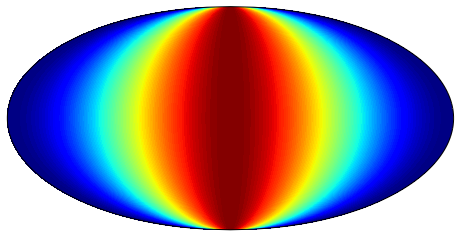

In [30]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

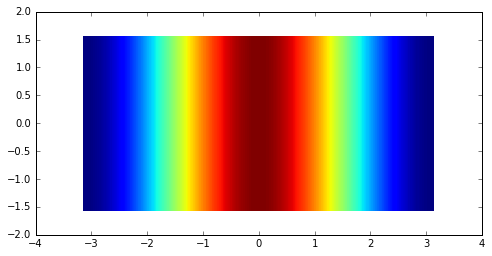

In [31]:
plt.figure(figsize=(8,4))
ax = plt.pcolormesh(x, y, field)
plt.show()

Для $l=\pm m$, $(l=1, 2)$ функция рвётся в полюсах (wiki and  http://background.uchicago.edu/~whu/tamm/webversion/node5.html)

In [32]:
# sigma

coef = 0.0

teta = y + pi/2*(N/4)*4/float(N)

for i in xrange(0, N/2):
    for j in xrange(1, N/2):
        coef = coef + sin(teta[i][j])
        
for i in xrange(N/2+1, N):
    for j in xrange(1, N/2):
        coef = coef + sin(teta[i][j])
        
print coef

sum1 = 0.0

teta = y + pi/2*(N/4)*4/float(N)

for i in xrange(0, N/2):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field[i][j])**2
        
for i in xrange(N/2+1, N):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field[i][j])**2
        
print sum1/coef
print sqrt(sum1/coef)

83279.0069872
0.119132613958
0.345155927022


In [33]:
field_coef = field / sqrt(sum1/coef)

Генерация по spin-weighted функциям

In [34]:
for j in xrange(0, N/2):
    
        teta = 2*pi*j/float(N)
        
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
                
        F = np.zeros((N+1))
        F_ = np.zeros((N+1))     
        
        func1 = 0.0
        func2 = 0.0
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):
                func1 = func1 + a_coef[m][l]*sYlm_fix(-1, l, m, teta)
                func2 = func2 + b_coef[m][l]*sYlm_fix(-1, l, m, teta)
    
            F[m] = func1
            F_[m] = func2
                
            func1 = 0.0
            func2 = 0.0
    
        T = np.real(fft(F)) + np.imag(fft(F_))
        
        for i in xrange(0, N):
            phi = pi*i*2/float(N)
           
            field[i][j] = T[i]
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

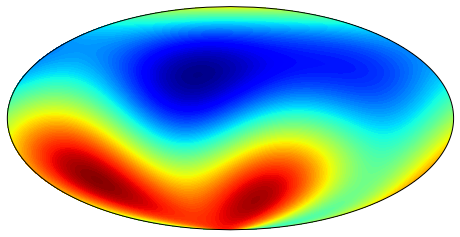

In [35]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(8,4))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

Другие реализации из (http://healpix.jpl.nasa.gov/pdf/intro.pdf)

In [36]:
plt.figure(figsize=(8,4))
ax = plt.pcolormesh(x, y, field)
plt.plot(pi/4, pi/4, 'kx', ms = 20)

In [37]:
plt.figure(figsize=(15,7))
ax = plt.pcolormesh(x, y, field)

f = field + 0.18

teta = y
phi = x

for i in xrange(0, N-1):
    for j in xrange(0, N/2-1):
        
        
        h_teta = y[N/2+1][N/4+1]
        h_phi = fabs(x[i][0] - x[i+1][0])
        
        sql = 0.0
         
        phi1 = 0.0
        phi2 = 0.0
        teta1 = 0.0
        teta2 = 0.0
        
        if (f[i][j]*f[i][j+1] < 0.0):
                    
            if (f[i][j]*f[i+1][j] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
            
                teta2 = teta[i][j]
                phi2 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                plt.plot(x[i][j], y[i][j], 'kx', ms = 5)
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                plt.plot(x[i][j], y[i][j], 'kx', ms = 5)
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                plt.plot(x[i][j], y[i][j], 'kx', ms = 5)
                
                
            
        if (f[i][j]*f[i+1][j] < 0.0):
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)  
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                plt.plot(x[i][j], y[i][j], 'kx', ms = 5)
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                plt.plot(x[i][j], y[i][j], 'kx', ms = 5)
            
        if (f[i+1][j]*f[i+1][j+1] < 0.0):
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i+1][j]
                teta1 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2) 
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                plt.plot(x[i][j], y[i][j], 'kx', ms = 5)

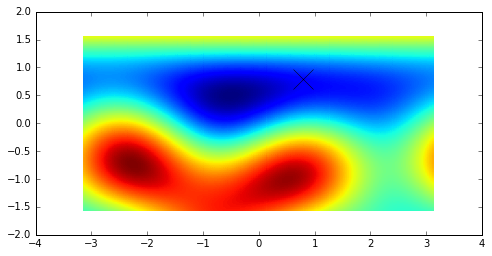

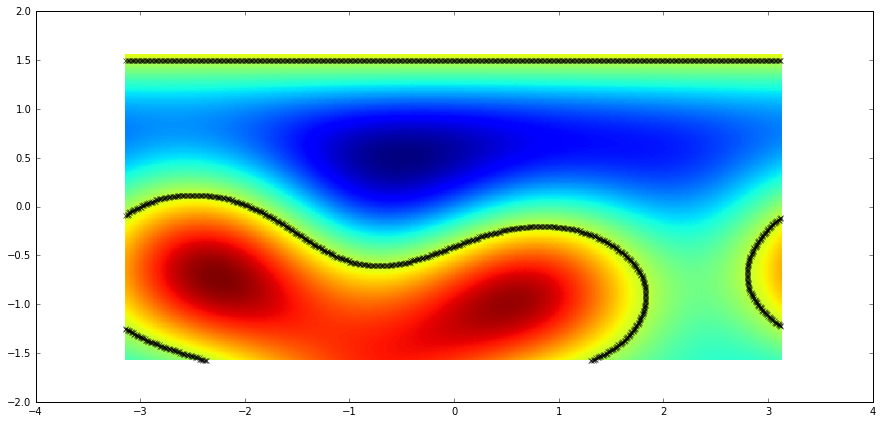

In [38]:
plt.show()